In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

#### Prepare data list

In [3]:
!ls ../../data

dress_dresslen_train_test_splits.json	dress_sleeve_train_test_splits.json
dress_sleevelen_train_test_splits.json


In [4]:
!ls ../../data

dress_dresslen_train_test_splits.json	dress_sleeve_train_test_splits.json
dress_sleevelen_train_test_splits.json


In [5]:
import json
with open("../../data/dress_sleeve_train_test_splits.json", "r") as infile:
    data_dict = json.load(infile)

In [6]:
data_dict.keys()

dict_keys(['X_train_1', 'y_train_1', 'X_test_1', 'y_test_1', 'X_train_2', 'y_train_2', 'X_test_2', 'y_test_2', 'X_train_3', 'y_train_3', 'X_test_3', 'y_test_3', 'X_train_4', 'y_train_4', 'X_test_4', 'y_test_4', 'X_train_5', 'y_train_5', 'X_test_5', 'y_test_5', 'X_train_6', 'y_train_6', 'X_test_6', 'y_test_6', 'X_train_7', 'y_train_7', 'X_test_7', 'y_test_7', 'X_train_8', 'y_train_8', 'X_test_8', 'y_test_8', 'X_train_9', 'y_train_9', 'X_test_9', 'y_test_9', 'X_train_10', 'y_train_10', 'X_test_10', 'y_test_10'])

In [7]:
data_dict['X_train_1'][:5]

['/2/8/2893552_3773662.jpg',
 '/2/4/2431229_3158108.jpg',
 '/2/9/2982376_3889235.jpg',
 '/3/6/3676414_8284307.jpg',
 '/2/7/2783355_3578973.jpg']

#### Create list of image paths

In [8]:
!python -V

Python 3.6.5


In [9]:
image_paths_train = []
image_paths_test = []

root_data_dir = "/home/jovyan/vmldata/raw_source_data/v20180810_all_wearables"

for key, val in data_dict.items():
    if 'X_train' in key:
        image_paths_train.extend([root_data_dir + imgpath for imgpath in val])
    elif 'X_test' in key:
        image_paths_test.extend([root_data_dir + imgpath for imgpath in val])

print(f"Number of train image paths: {len(image_paths_train):,d}")
print(f"Number of test image paths: {len(image_paths_test):,d}")
print()
print("Sample paths:")
print(image_paths_train[0])
print(image_paths_train[-1])
print(image_paths_test[0])
print(image_paths_test[-1])

Number of train image paths: 207,603
Number of test image paths: 23,067

Sample paths:
/home/jovyan/vmldata/raw_source_data/v20180810_all_wearables/2/8/2893552_3773662.jpg
/home/jovyan/vmldata/raw_source_data/v20180810_all_wearables/2/7/2713940_3640098.jpg
/home/jovyan/vmldata/raw_source_data/v20180810_all_wearables/2/8/2856150_3749586.jpg
/home/jovyan/vmldata/raw_source_data/v20180810_all_wearables/3/0/3058817_8191784.jpg


In [49]:
from torchvision import transforms
from dataloader_tools import get_imagelist_dataloader, ImageListDataset#, ImageListTopHalfDataset

BATCH_SIZE = 100

#composed = transforms.Compose([transforms.Resize((260,260)), transforms.ToTensor()])
#composed = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])
#composed = transforms.Compose([transforms.CenterCrop((130,214)),transforms.ToTensor()])
#composed = transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda x: x[:130])]) # get top half
#composed = transforms.Compose([transforms.ToTensor()])
#composed = transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])
composed = transforms.Compose([transforms.CenterCrop((90,90)),transforms.Resize((64,64)),transforms.ToTensor()])

train_dataset = ImageListDataset(image_paths_train, cut_from='top', cut_amount=90, transform=composed)
test_dataset = ImageListDataset(image_paths_test, cut_from='top', cut_amount=90, transform=composed)

train_loader = get_imagelist_dataloader(batch_size=BATCH_SIZE, dataset_object=train_dataset)
test_loader = get_imagelist_dataloader(batch_size=BATCH_SIZE, dataset_object=test_dataset)

In [50]:
for x in train_loader:
    one_batch_data, one_batch_labels = x
    break

In [51]:
print(len(one_batch_data),len(one_batch_labels),one_batch_data.shape)

100 100 torch.Size([100, 3, 64, 64])


In [52]:
print(one_batch_data[0].shape)
print(type(one_batch_data[0]),type(one_batch_data[0].numpy()))

torch.Size([3, 64, 64])
<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [53]:
import matplotlib.pyplot as plt

def draw_results(data_batch,cut=False):

    #fig, ax = plt.subplots(figsize=(6, 8))
    #ax.imshow(img)
    #ax.set_title("index: {:}\n".format(_index) + "/" + "/".join(dist_data.iloc[0, 0].split("/")[-3:]))
    #ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

    fig, axs = plt.subplots(5, 10, figsize=(30, 20))

    for idx in range(50):
        img = np.transpose(data_batch[idx].numpy(),(1, 2, 0))
        if cut == 'top':
            img = img[:130,:,:]
        if cut == 'bottom':
            img = img[130:,:,:]
        #print(img.shape)
        axs.flatten()[idx].imshow(img)
        #axs.flatten()[idx].set_title("Distance: {:2.2f}".format(dist_data.loc[idx, "distance"]), size=16)
        #axs.flatten()[idx].set_title("Distance: {:2.2f}".format(dist_data.loc[idx, "distance"]), size=16)
        axs.flatten()[idx].tick_params(axis='both', which='both', bottom=False, top=False, 
                                       labelbottom=False, right=False, left=False, labelleft=False)
        

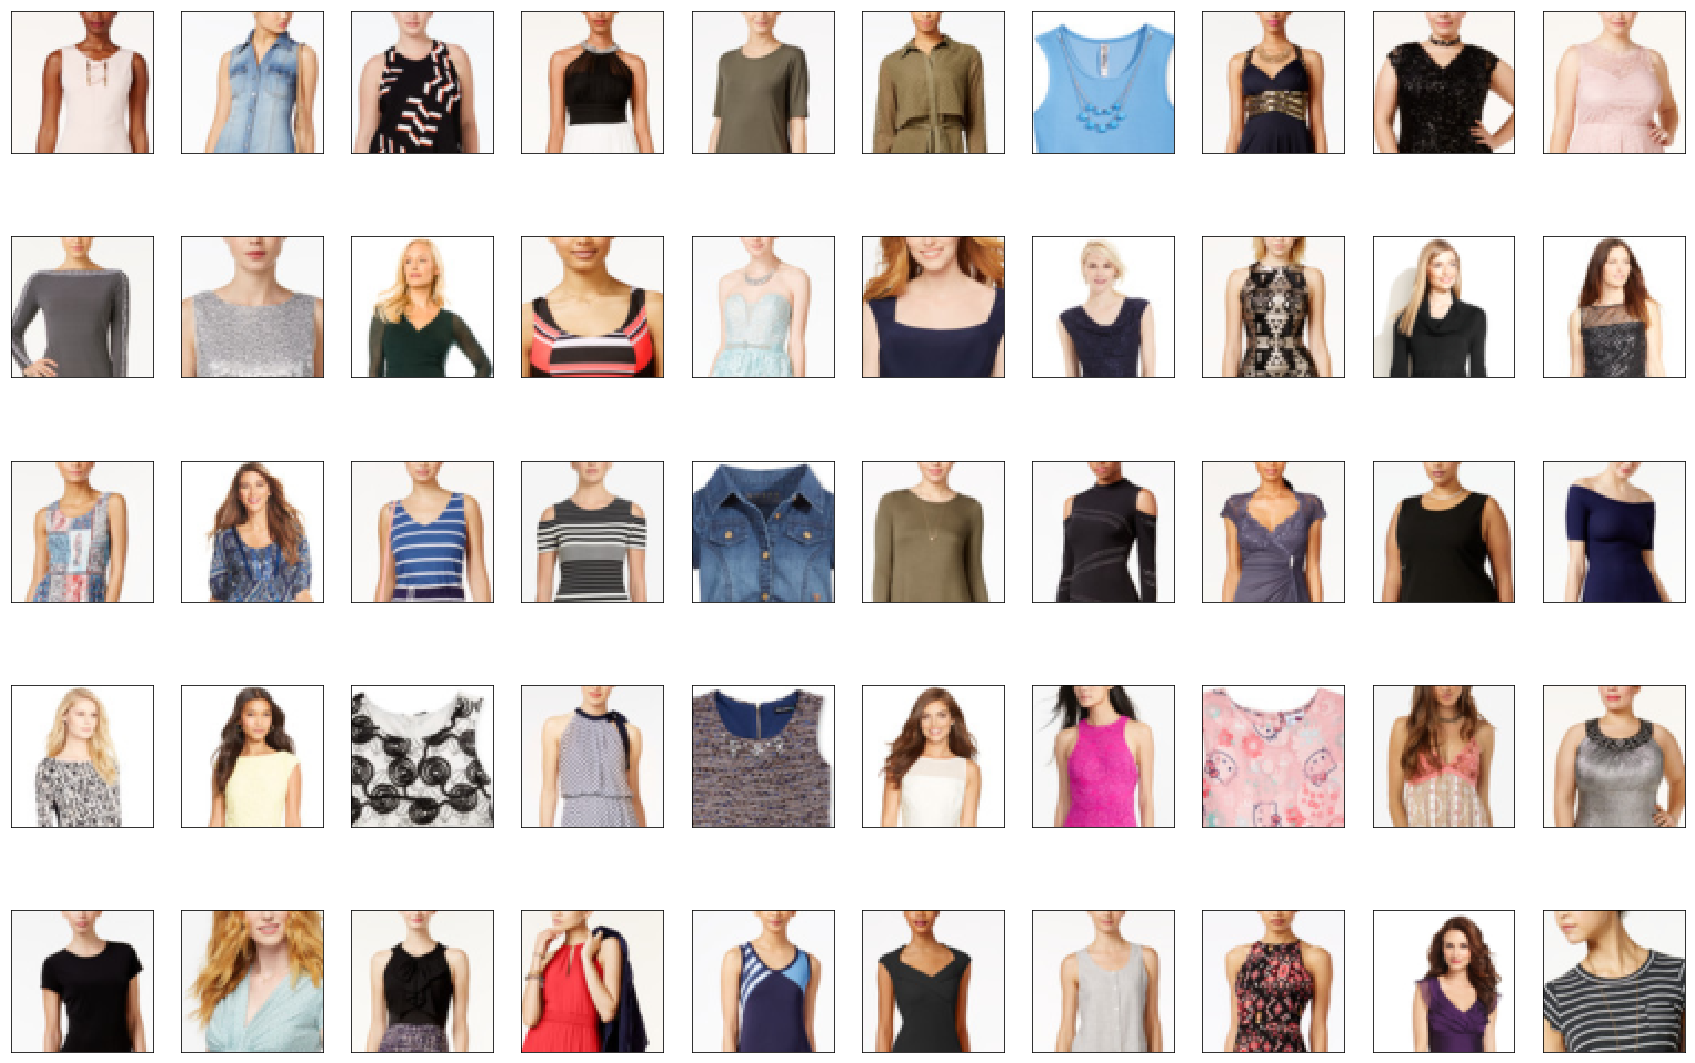

In [54]:
draw_results(one_batch_data,cut=None)

In [ ]:
draw_results(one_batch_data,cut='bottom')